[1] "Leyendo:  ocean_mitad_viento 29jun"
[1] 8.264209
[1] "Leyendo:  ocean_mitad_viento 22jul"
[1] 8.552559


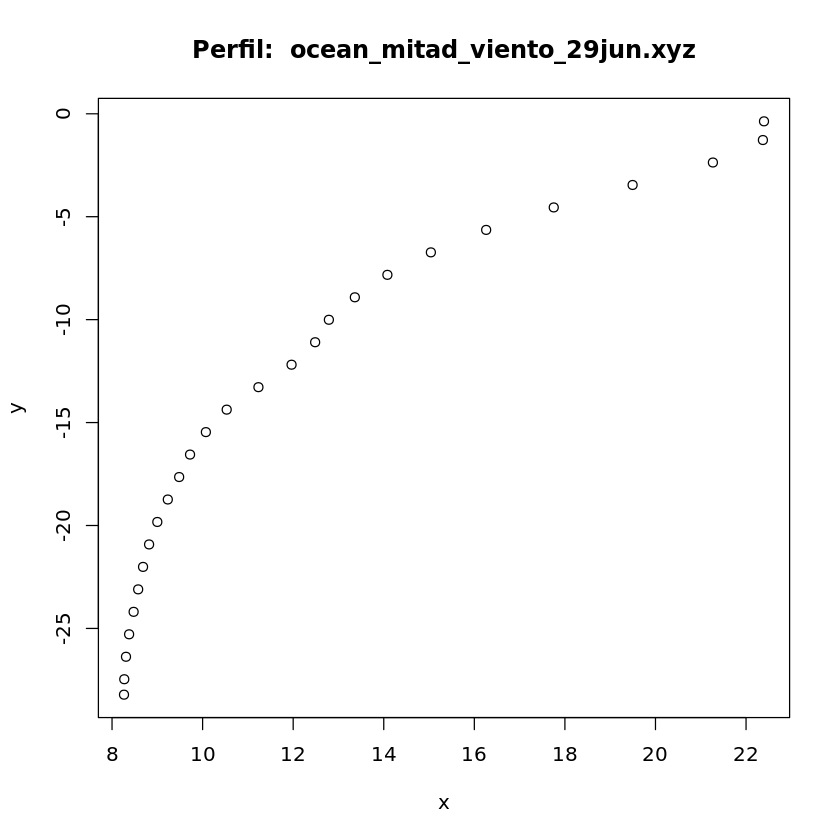

[1] "Leyendo:  ocean_mitad_viento 6ago"
[1] 8.806707


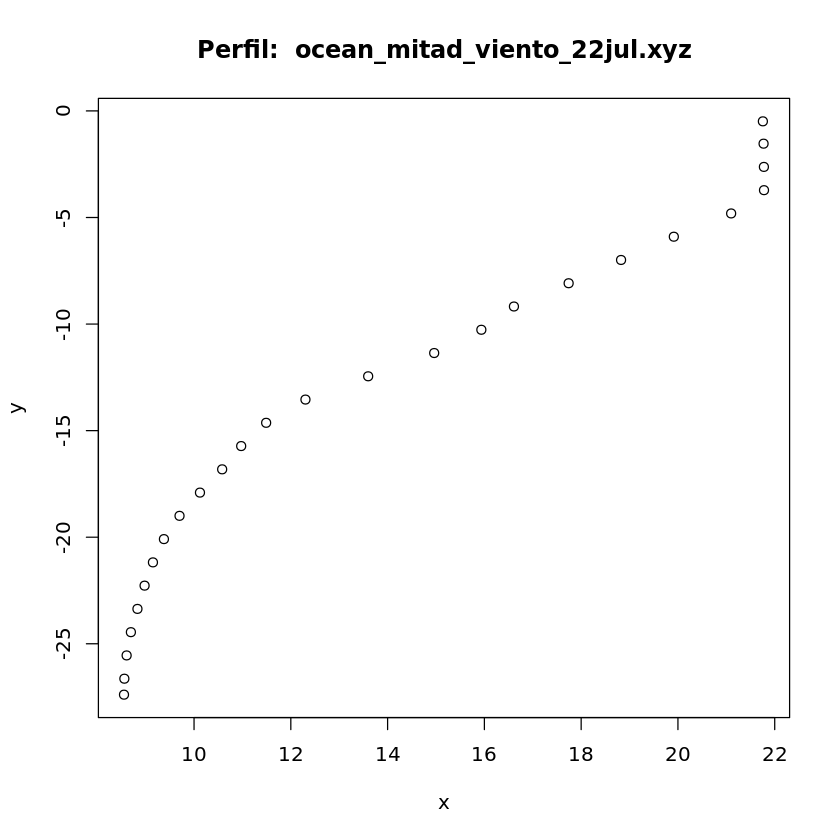

[1] "Leyendo:  ocean_mitad_viento 8sept"
[1] 9.78792


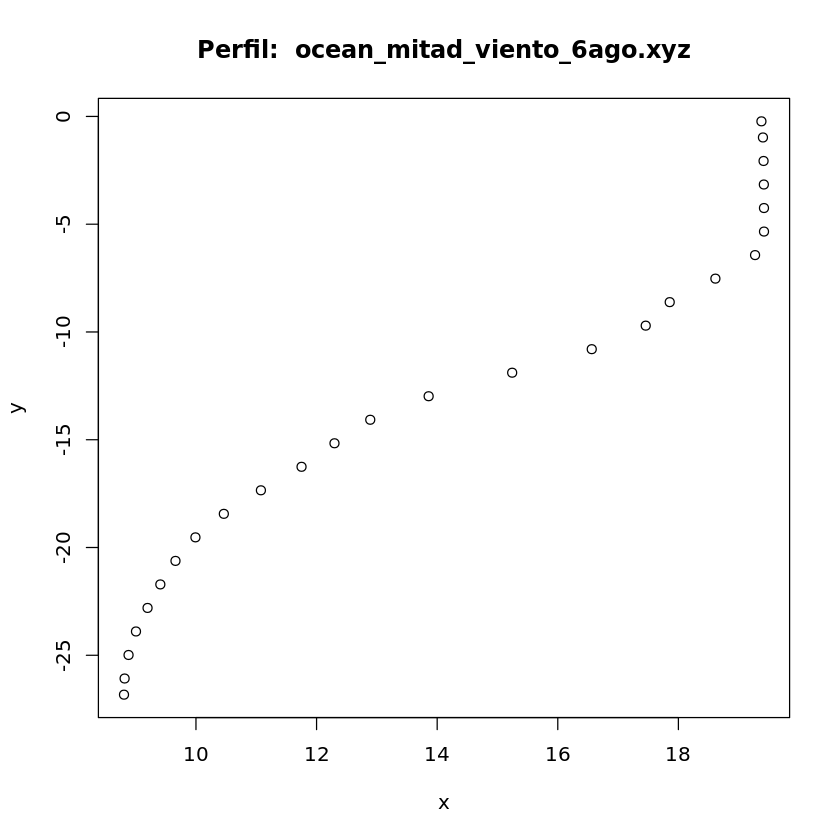

[1] "Leyendo:  ocean_mitad_viento 4oct"
[1] 11.00201


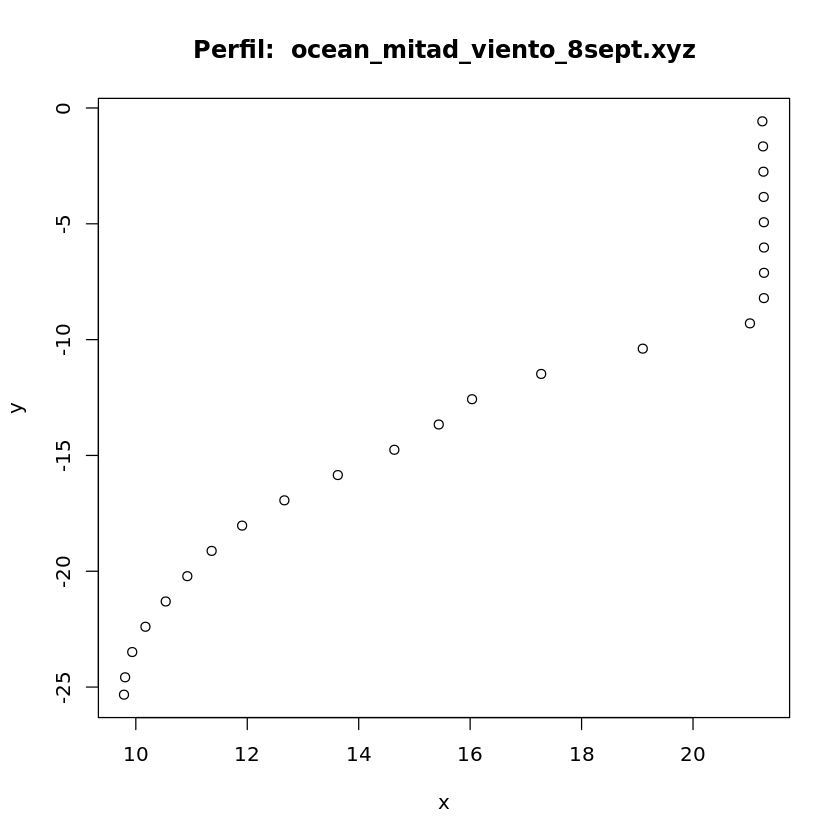

[1] "Leyendo:  ocean_mitad_viento 14oct"
[1] 11.55823


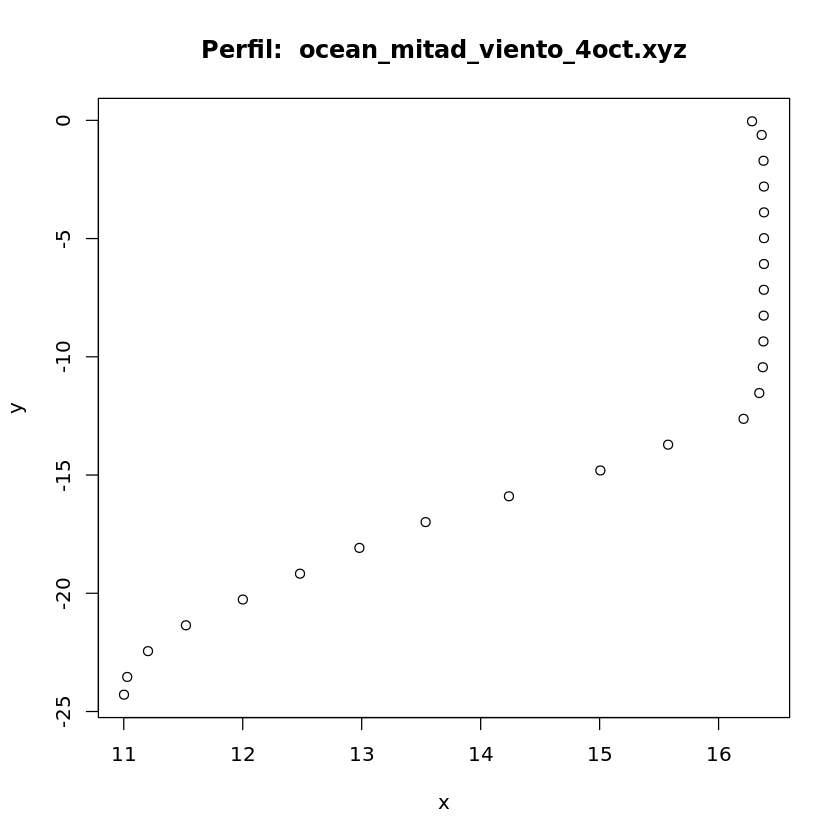

[1] "Leyendo:  ocean_mitad_viento 3nov"
[1] 11.88611


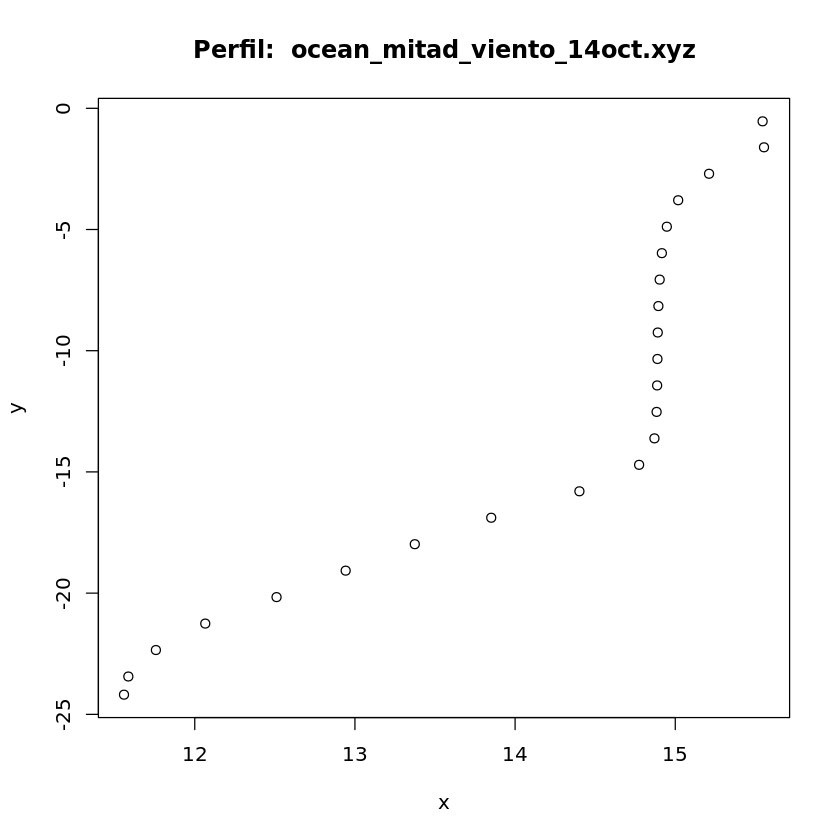

[1] "Creando parametro: ocean_mitad_viento_Te"
[1] "Creando parametro: ocean_mitad_viento_Th"
[1] "Creando parametro: ocean_mitad_viento_alfa"
[1] "Creando parametro: ocean_mitad_viento_n"
[1] "Creando parametro: ocean_mitad_viento_Zt"
[1] "Creando parametro: ocean_mitad_viento_TZt"
[1] "Creando parametro: ocean_mitad_viento_TZtprima"
[1] "Creando parametro: ocean_mitad_viento_Zu"
[1] "Creando parametro: ocean_mitad_viento_Zb"
[1] "Creando parametro: ocean_mitad_viento_S"
[1] "Leyendo:  ocean_original 29jun"
[1] 8.289919


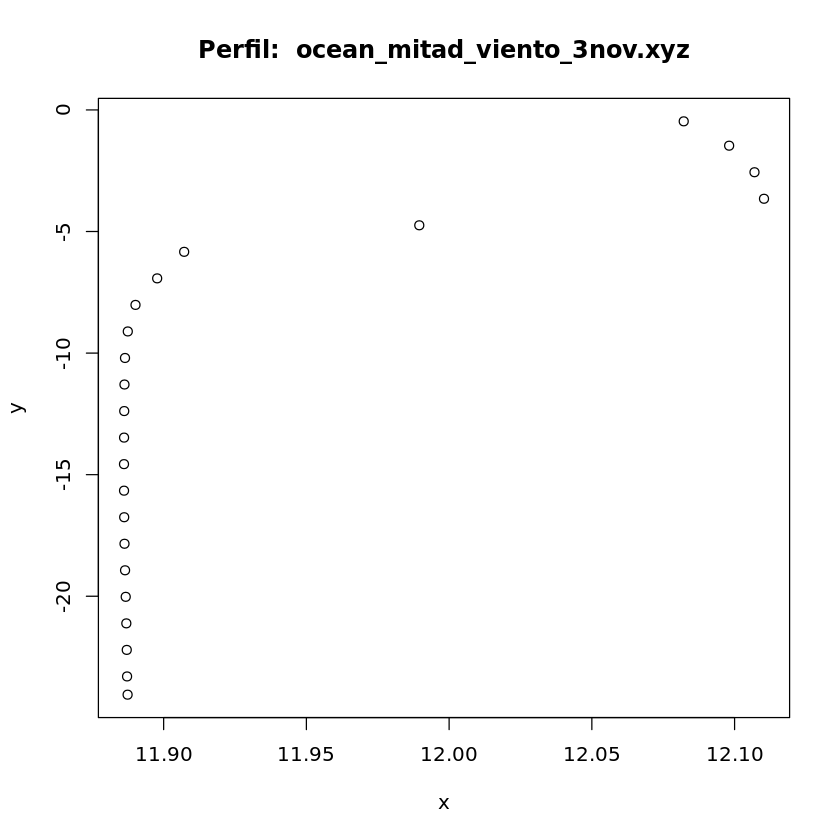

[1] "Leyendo:  ocean_original 22jul"
[1] 8.641225


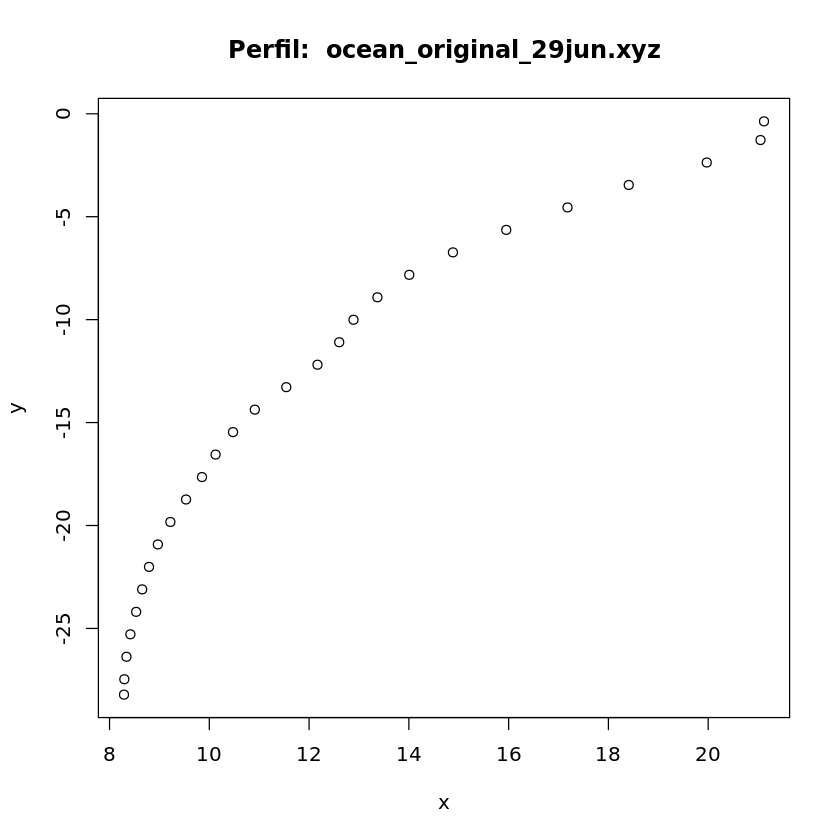

[1] "Leyendo:  ocean_original 6ago"
[1] 8.939797


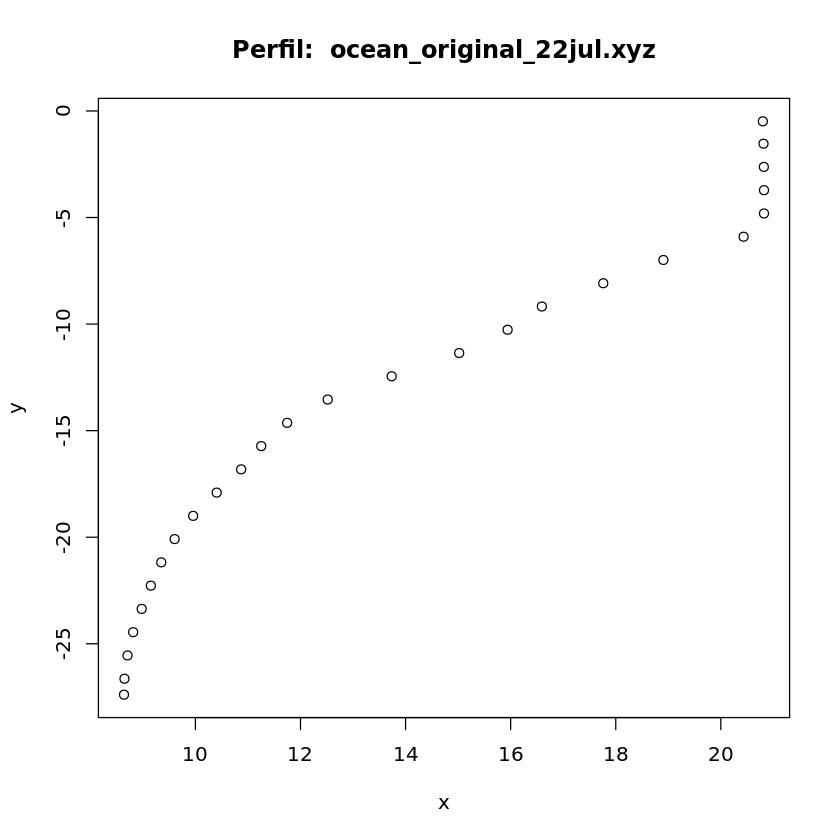

[1] "Leyendo:  ocean_original 8sept"
[1] 9.968608


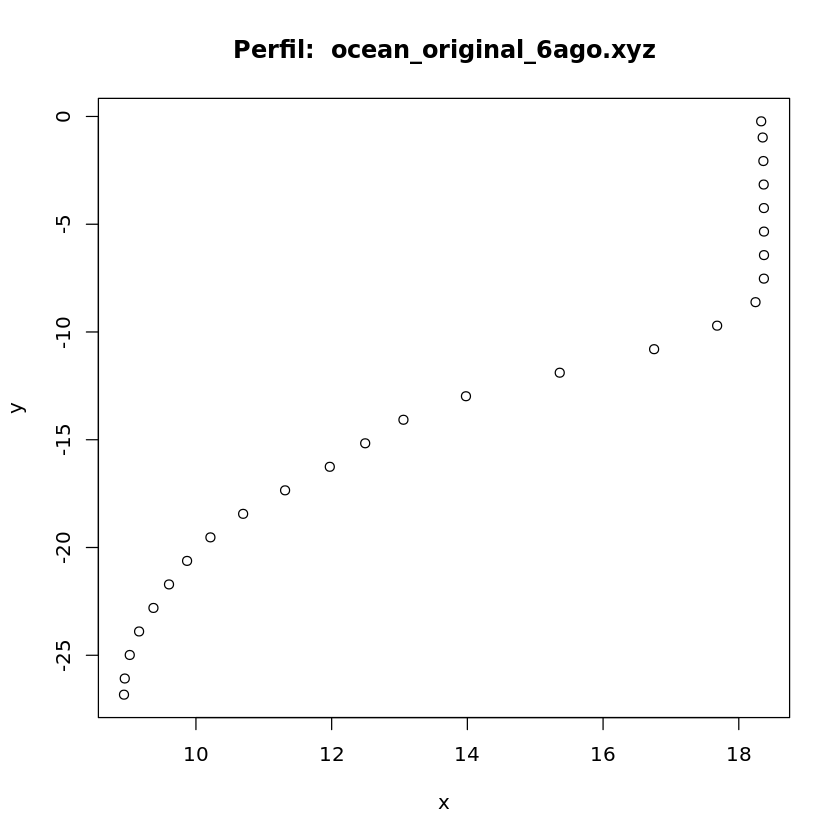

[1] "Leyendo:  ocean_original 4oct"
[1] 11.18101


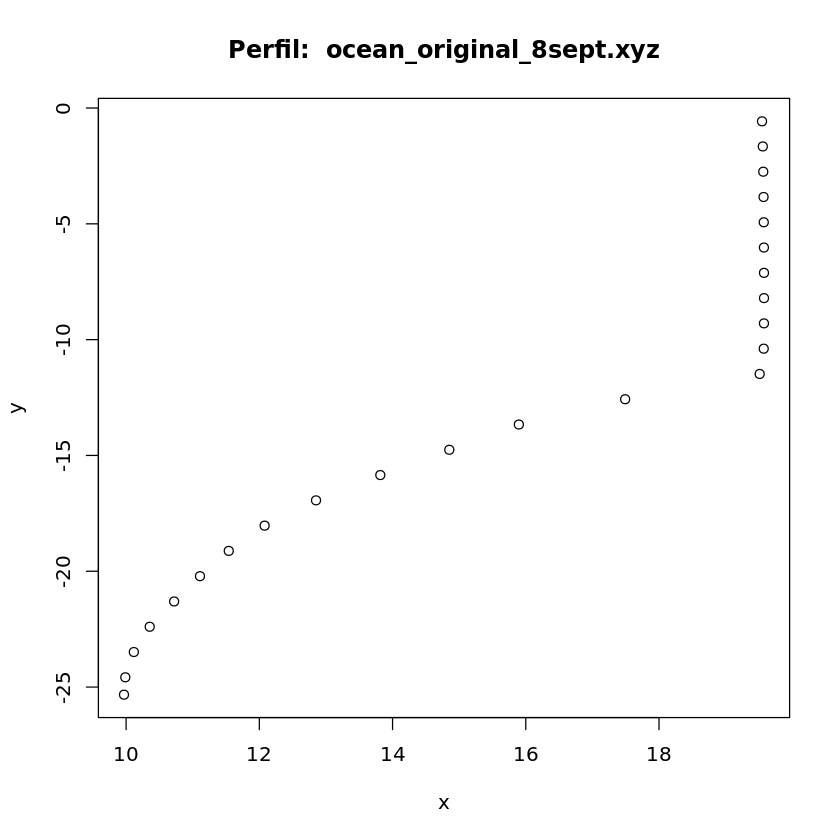

[1] "Leyendo:  ocean_original 14oct"
[1] 11.81825


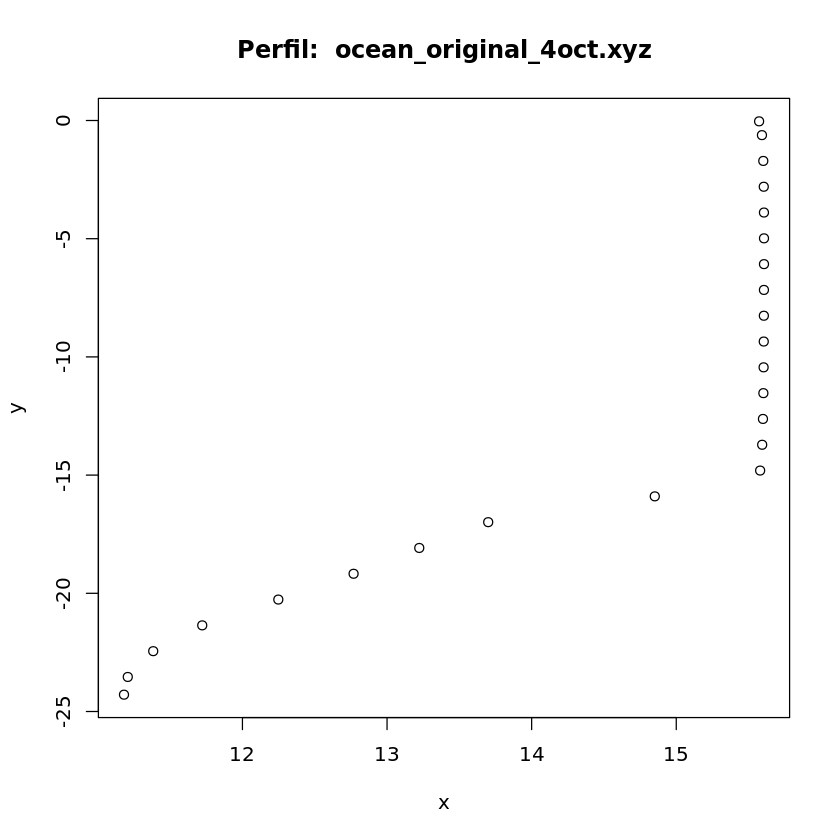

[1] "Leyendo:  ocean_original 3nov"
[1] 10.60298


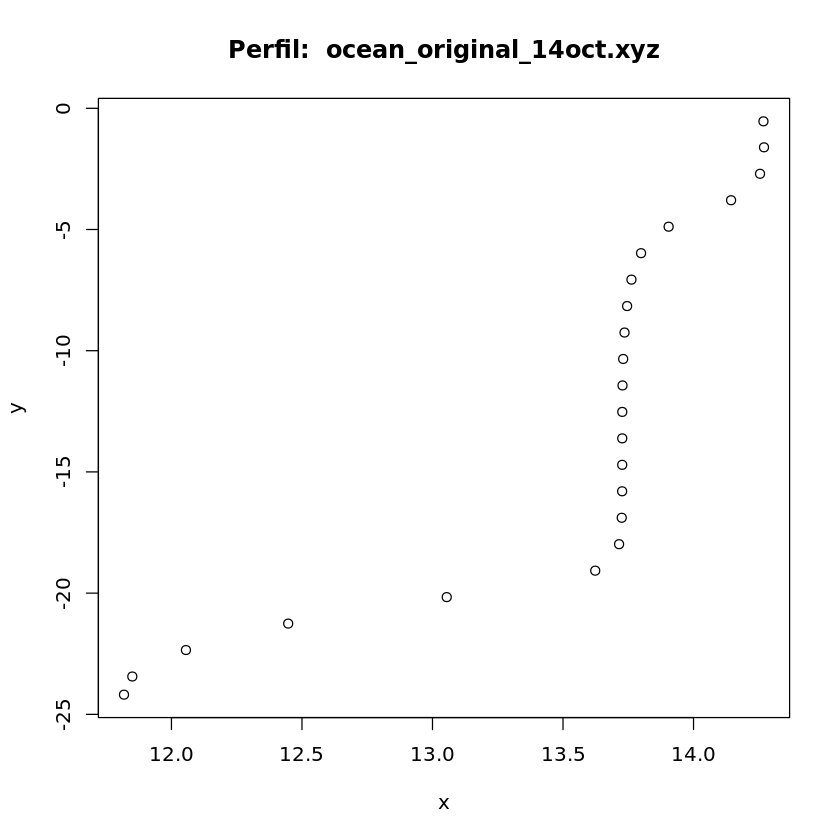

[1] "Creando parametro: ocean_original_Te"
[1] "Creando parametro: ocean_original_Th"
[1] "Creando parametro: ocean_original_alfa"
[1] "Creando parametro: ocean_original_n"
[1] "Creando parametro: ocean_original_Zt"
[1] "Creando parametro: ocean_original_TZt"
[1] "Creando parametro: ocean_original_TZtprima"
[1] "Creando parametro: ocean_original_Zu"
[1] "Creando parametro: ocean_original_Zb"
[1] "Creando parametro: ocean_original_S"
[1] "Grafica para parametro Te"
[1] "Grafica para parametro Th"
[1] "Grafica para parametro alfa"
[1] "Grafica para parametro n"
[1] "Grafica para parametro Zt"
[1] "Grafica para parametro TZt"
[1] "Grafica para parametro TZtprima"
[1] "Grafica para parametro Zu"
[1] "Grafica para parametro Zb"
[1] "Grafica para parametro S"


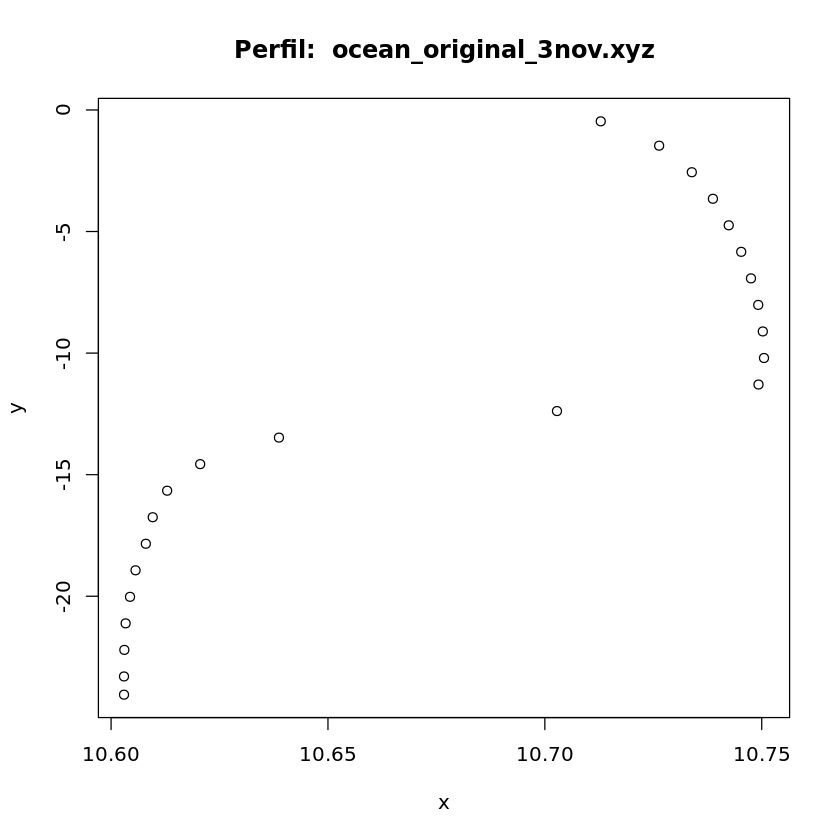

In [1]:
getTe <- function(data){

    media = data$x[1];
    numElem = 1;
    
    for(i in 1:length(data$x)) 
    {
        if (data$y[i] > -1)
        {
            media = media + data$x[i]
            numElem = numElem + 1
        }
    }

    return (media/numElem)
}

min.RSS <- function(data, par) {
    r <- with(data, sum((x-(Th+((Te-Th)/((1+((par[1]*(-y))^par[2]))^(1-1/par[2])))))^2))
    return (r)
}

mod.RSS <- function(data, par) {
    with(data, (Th+((Te-Th)/((1+((par[1]*(-y))^par[2]))^(1-1/par[2])))))
}


paramTermoclina <- function(file){
    
#Esto es una ñapa que hacia falta solo en las salidas de los modelos, porque el nivel de agua es relativo, 
#pero con los valores reales no es necesario porque la profundidad que está almacenada en la base de datos es absoluta.
    water_level = 0
    if (grepl("murakami",file))
    {
        if(grepl("29jun",file))
        {
            water_level = 1.02
        } 
        if(grepl("22jul",file))
        {
            water_level = 1.56
        }  
        if(grepl("6ago",file))
        {
            water_level = 1.98
        }
        if(grepl("8sept",file))
        {
            water_level = 2.91
        }
        if(grepl("4oct",file))
        {
            water_level = 3.49
        }
        if(grepl("14oct",file))
        {
            water_level = 3.55
        }
        if(grepl("3nov",file))
        {
            water_level = 3.64
        }
    }
    if (grepl("ocean",file))
    {
        if(grepl("29jun",file))
        {
            water_level = 1.53
        } 
        if(grepl("22jul",file))
        {
            water_level = 2.36
        }  
        if(grepl("6ago",file))
        {
            water_level = 2.92
        }
        if(grepl("8sept",file))
        {
            water_level = 4.42
        }
        if(grepl("4oct",file))
        {
            water_level = 5.46
        }
        if(grepl("14oct",file))
        {
            water_level = 5.56
        }
        if(grepl("3nov",file))
        {
            water_level = 5.7
        }
    }
    if (grepl("sin_presas",file))
    {
        if(grepl("29jun",file))
        {
            water_level = 0.64
        } 
        if(grepl("22jul",file))
        {
            water_level = 0.75
        }  
        if(grepl("6ago",file))
        {
            water_level = 0.82
        }
        if(grepl("8sept",file))
        {
            water_level = 0.95
        }
        if(grepl("4oct",file))
        {
            water_level = 0.96
        }
        if(grepl("14oct",file))
        {
            water_level = 0.96
        }
        if(grepl("3nov",file))
        {
            water_level = 0.95
        }
    }
    #Aqui acaba la ñapa

    profile <- read.csv(file=file,head=FALSE,sep=" ") #Leo el CSV
    dat=data.frame(x=rev(profile[2]), y=rev(profile[1])) 
    colnames(dat) <- c( 'x', 'y') 
    dat$y <- rev(dat$y) + water_level
    dat$x <- rev(dat$x)

    #Minimo 9 valores para poder calcular los parametros y que tenga sentido
    if(length(dat$x) > 9)
    {
        Te <- getTe(dat) #Temperatura epilimnion
        Th <- min(dat$x) #Temperatura hipolimnion
        print(Th)
        result <- optim(par = c(0, 10), min.RSS, data = dat) #Calculo alfa y n, que son parametros de ajuste
        
        alfa <- result$par[1]
        n <- result$par[2]
        m <- 1-1/n
        
        #Parámetros derivados        
        Zt <- (1/alfa)*((1-(1/n))^(1-(1-(1/n))))
        TZt <- Th+((Te-Th)/((1+((alfa*(Zt))^n))^(1-1/n)))
        TZtprima <- (-1)*(((Te-Th)*(n-1)*((alfa*Zt)^n)*((((alfa*Zt)^n)+1)^((1/n)-2)))/(Zt))
        Zu <- Zt-((TZt-Te)/(TZtprima))
        Zb <- Zt-((TZt-Th)/(TZtprima))
        S <- (Te-Th)/(Zb-Zu)
    
        #Muestro y guardo la gráfica
        mod <- data.frame(x=mod.RSS(dat, c(alfa,n)),y=dat$y)
        plot(y ~ x, data = dat)
        title(paste("Perfil: ",file))
        lines(mod$x,mod$y)
        if (!is.nan(Te) && !is.nan(Th) && !is.nan(alfa) && !is.nan(n) && !is.nan(Zt) && !is.nan(TZt) && !   is.nan(TZtprima) && !is.nan(Zu) && !is.nan(Zb) && !is.nan(S))
        {
            insert = paste('Te =', round(Te,2),', Th =', round(Th,2), ', alfa =', round(alfa,2), ', n =', round(n,2), ', Zt =', round(Zt,2), ', TZt =', round(TZt,2), ', TZtprima =', round(TZtprima,2), ', Zu =', round(Zu,2), ', Zb =', round(Zb,2), ', S =', round(S,2))
            print(insert)        
        }
    }
    return (c(Te, Th, alfa, n, Zt, TZt, TZtprima, Zu, Zb, S))
}
#El formato de CSV que utiliza es xyz separado por espacio. Esto habría que adaptarlo a algo más general. 
#Ademas cada perfil esta separado en ficheros independientes y para preservar serían datasets de un año.
#Lista de los ids de los distintas salidas de modelos
modelos <- c('ocean_mitad_viento', 'ocean_original')
#Fechas id de los distintos ficheros
fechas <- c('29jun','22jul','6ago','8sept','4oct','14oct','3nov')
#Fechas a mostrar en la gráfica
dates <- c("2010-06-29", "2010-07-22", "2010-08-06", "2010-09-08", "2010-10-04", "2010-10-14", "2010-11-03")

#Transforma las fechas en texto en formato date
dates <- as.Date(dates)
#Lista de parámetros a calcular
params <- c('Te', 'Th', 'alfa', 'n', 'Zt', 'TZt', 'TZtprima','Zu','Zb','S')

#Este bloque son salidas obtenidas por otros medios, creo recordar que con excel o a partir de la base de datos directamente
real_Th <- c(8.92,8.89,9.9,9.47,10.63,11.06,11.02)
real_Te <- c(21.7,23.35,19.56,20.21,16.24,15.6,11.59)
real_alfa <- c(0.17,0.16,0.09,0.08,0.05,0.06,0.39)
real_n <- c(2.9,3.16,6.5,8.85,71.28,5.52,3.01)
real_Zt <- c(4.97,5.64,10.44,13.05,18.67,15.25,2.25)
real_TZt <- c(18.11,19.02,15.65,15.59,13.48,13.84,11.42)
real_TZtprima <- c(-1.39,-1.57,-1.39,-1.73,-5.33,-0.37,-0.14)
real_Zu <- c(2.38,2.89,7.63,10.37,18.15,10.52,1.11)
real_Zb <- c(11.57,12.08,14.58,16.58,19.2,22.74,5.05)
real_S <- c(1.39,1.57,1.39,1.73,5.33,0.37,0.14)

Th = 0
Te = 0

#Recorre los distintos tipos de modelos y las fechas de cada uno
for (modelo in modelos){
    for (fecha in fechas)
    {
        print(paste("Leyendo: ",modelo,fecha)) #Mensaje para controlar
        
        #Se crea una nueva variable a partir de los valores de "modelo" y  "fecha" y se le asigna el resultado del metodo paramTermoclina, 
	#que es un vector con los diez valores que definen las caracteristicas de la termoclina        
        assign(paste(modelo,'_',fecha,sep=""),paramTermoclina(paste(modelo,'_',fecha,'.xyz',sep="")))
    }
    
    #Para cada uno de los parámetros de la lista
    for (param in params)
    {
        tempVector <- vector() #Se inicializa un vector
        print(paste("Creando parametro: ",modelo,"_",param,sep="")) #Control

        #Para cada una de las fechas definidas        
        for (fecha in fechas)
        {
            #Si el resultado obtenido para el parametro "param" es nan, se pone un 0
            if (is.nan(get(paste(modelo,"_",fecha,sep=""))[match(param,params)]))
            {
                tempVector <- c(tempVector,0)
            }
            #Si no se asigna el valor del parametro "param" al vector temporal
            else {
                tempVector <- c(tempVector,get(paste(modelo,"_",fecha,sep=""))[match(param,params)])
            }
        }
        #Se asigna el vector con todos los valores en las distintas fechas a una nueva variable con el id del modelo 
 	#y el nombre del parametro. e.g. ocean_Th.
        assign(paste(modelo,"_",param,sep=""),tempVector) 
    }
}

#Agrego los datos reales
modelos <- c(modelos,'real')

#Para mostrar las distintas gráficas
for (param in params)
{
    print(paste("Grafica para parametro",param))
    #Obtengo maximo y minimo para cada parametro (para los rangos)
    assign(paste(param,"Max",sep=""),0)
    assign(paste(param,"Min",sep=""),99999)
    
    #Calculo el valor máximo y minimo para que las gráficas queden bonitas
    for (modelo in modelos){
        if (max(get(paste(modelo,"_",param,sep="")))>get(paste(param,"Max",sep="")))
        {
            assign(paste(param,"Max",sep=""),max(get(paste(modelo,"_",param,sep=""))))
        }
        if (min(get(paste(modelo,"_",param,sep="")))<get(paste(param,"Min",sep="")))
        {
            assign(paste(param,"Min",sep=""),min(get(paste(modelo,"_",param,sep=""))))
        }   
    }

    
    # get the range for the x and y axis 
    xrange <- c(1,length(get(paste(modelo,"_",param,sep=""))))
    yrange <- c(get(paste(param,"Min",sep="")),get(paste(param,"Max",sep="")))

    # set up the plot
    png(filename=paste(param,"_todas",".png",sep=""), height=600, width=800, bg="white")
    plot(xrange, yrange, type="n", xlab="",
      	 ylab=param ) 
    axis(1, labels = FALSE)
    colors <- rainbow(length(modelos)) 
    linetype <- c(1:length(modelos)) 
    plotchar <- seq(18,18+length(modelos),1)
    i = 1
    for (modelo in modelos) { 
       lines(c(1:length(fechas)), get(paste(modelo,"_",param,sep="")), type="b", lwd=1.5,
       lty=linetype[i], col=colors[i], pch=plotchar[i]) 
       text(1:7, get(paste(param,"Min",sep="")) - 0.25, srt = 45, adj = 1, labels = fechas, xpd = TRUE)
       i=i+1
    } 

    title(param)
    par(xpd=TRUE)
    legend(xrange[1], yrange[2], modelos, cex=0.8, col=colors,
  	 pch=c(1,2), lty=linetype, title="Model")
    dev.off()
        
}

#jpeg(paste("perfil_",profileList$startDate[i]),"jpg")
 #   plot(y ~ x, data = dat)
  #  title(paste("Perfil: ",profileList$startDate[i]))
   # lines(mod$x,mod$y)
    #dev.off()


# Methods:
#"Nelder-Mead", "BFGS", "CG", "L-BFGS-B", "SANN", "Brent"

# Leer csv
#mysurface <- read.csv('termoclina08.csv', header=FALSE, sep = ";")
#dat <- data.frame(x = mysurface[,1], y = mysurface[,2])
